# **`Overfitting & Underfitting`**

- Why this topic even exists: 
    - Because a model can learn too little or too much and both are BAD 
    - Our job is to find the sweet spot.

## Bias vs Variance 

### Bias
- Bias is when a model has a tendency to make errors due to simplifying the details of the data 
- With **High Bias** the model is too simplistic and therefore can't capture true patterns and nuances in data
- High Bias causes Underfitting 

### Variance
- Variance is model's sensitivity to details and small nuances in **training** dataset
- With **High Variance** the model is too complex and therefore fits the training data too tightly, including noise
- High Variance causes Overfitting

### Example for Classification 

Objective in the diagram below :  Separating 'Green-Crosses' from 'Yellow-Circles'.
There are 3 different models:

![fitting.png](https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png)

### Example for Regression 

![vb](https://miro.medium.com/v2/resize:fit:1400/1*9hPX9pAO3jqLrzt0IE3JzA.png)

### For both Classification & Regression:
- Appropriate-fitting --> balance between **Bias** and **Variance**
- Under-fitting --> high **Bias**
- Over-fitting --> high **Variance**

- There is a trade-off between Bias and Variance:
    - You can’t minimize both at the same time: 

        - Increase model complexity → **bias ↓**, **variance ↑**

        - Decrease complexity → **bias ↑**, **variance ↓**

    - 🎯 Goal: **sweet spot** where both are reasonably low.

### Addressing Overfitting & Underfitting

#### To address **Overfitting**: 
1. **Simplify the model** by reducing its complexity and noise 
    - Using Fewer Features 
    - Focusing on features that matters most (carries more weights)
    - Reducing the value/intensity of Hyper-parameters 
2. Applying **Regularization**
3. Improving **Data Quality**(reduce noise)
4. Increasing amount of **training data** to get more diverse examples for model to learn from
5. Employing `Cross-Validation`
6. Using `Ensemble Learning Method`

#### To address **Underfitting**:
1. **Increase complexity** of model by:
    - Adding more insightful features 
    - Increasing the value/intensity of Hyper-parameters 
2. **Adding** more relevant data points  
3. Reducing **Regularization** (if it was initially applied)
4. Improving **Data Quality**
5. Choosing a **better** ML algorithm



## **`Exercise`**
### Detecting & Preventing Overfitting & Underfitting

**Objectives** :
- Build an Artificial Dataset
- Use Decision Tree Classifier
- Monitor Underfitting and Overfitting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_moons      # Create fake data
from sklearn.model_selection import train_test_split              # Split data
from sklearn.tree import DecisionTreeClassifier                   # The algo we'll be using 
from sklearn.metrics import accuracy_score                        # Checks performance

- `from sklearn.datasets import make_classification, make_moons`
    - **make_classification**: generates synthetic numeric datasets for classification
    - **make_moons**: generates non-linearly separable, moon-shaped classification data

- `from sklearn.model_selection import train_test_split`
    - splits the dataset into training and testing sets

- `from sklearn.tree import DecisionTreeClassifier`
    - implements a decision tree model for classification tasks

- `from sklearn.metrics import accuracy_score`
    - computes the accuracy of the model (correct predictions / total predictions)


### 1. Generate & Prepare The Data

In [2]:
X, y = make_classification(n_samples=9000,   #Row count 
                           n_features=18,    #Column count
                           n_informative=4,  #4 useful features/columns - actually help predict the target 
                           n_redundant=12,   #12 redundant columns in informative features 
                           random_state=2
                          )

# total columns = 18, out of which '4' are useful & '12' are redundant so the remaining 2 columns are just Noise

- Redundant features = repeat existing signal
- Noise features = contain no signal at all

Therefore, Redundant features and Noise features are different and not considered one 

In [3]:
print(X[:4])

[[ 2.15631115 -1.69009525  0.85714501 -0.55237974 -1.29713357  2.41049057
   1.21394205  1.09574044 -0.27112028 -0.20828617 -0.74540214  0.15874997
  -0.12124403  0.41527157 -1.4665927   0.24655728 -2.68791625  0.21728147]
 [ 1.12057112 -0.06407922  1.04214442 -0.08316613 -1.09791873  0.90701872
  -1.22117341  1.15110676  0.4542019  -0.5555228  -0.42382371 -0.34233904
  -0.55241524  0.54362834 -1.12509168  0.46288361 -0.97242942  1.05363474]
 [ 0.74357671 -0.82491074 -1.79508674 -1.14081778  0.82869506  0.88458002
  -0.41430632 -1.26100077 -0.47885349  1.27796832 -1.24917637 -0.53498257
   0.07845352  0.66805215 -0.34665299 -1.54410869 -0.52434322 -1.72745768]
 [-1.43574439  1.57725257  0.28832671  0.91504136  0.30952157 -1.91487722
  -1.99874514  0.02931424  0.45691844 -0.46141609  0.72370715 -0.199109
  -0.06724064  0.42100685  0.74943438  0.28939435  1.80001553  0.80159623]]


> Now this is a NumPy array

### 2. Split the data into Train & Test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

### 3. Training The Model

- We will be using the Decision Tree Classifier
- About: 
    - Decision Tree algo is very a popular **supervised learning** algo. Can be used for both:
        - Classification : `DecisionTreeClassifier`
        - Regression : `DecisionTreeRegressor`
    - It creates a tree-like model where: 
        - Each **internal node** represents a feature or attribute
        - Each **branch** represents a decision rule
    - It works by splitting the dataset into smaller subsets based on feature values, forming a tree-like structure, and finally predicting a class label at the leaf nodes.
    - The algo evaluates each feature and threshold combination to find the ones that best separates the data into the distinct classes 

![](https://www.researchgate.net/publication/389061679/figure/fig1/AS:11431281310386417@1739816115336/Example-of-using-a-decision-tree-to-determine-the-risk-of-heart-disease-Source-Mishra.png)

In above decision tree, we have 3 things: 

1. If individual is below 18 and is Overweighted or not
2. If individual is between 18-30 
3. If individual is above 30 and is a Smoker or not 

- Decision Tree can get very Complex. Its complexity can be controlled by using `max_depth()`

- **`max_depth()`**:
    - max_depth is a parameter that controls the maximum number of levels (depth) a decision tree is allowed to grow
    - It limits how **tall** the tree can be

**Objective** of this demo:
1. Start training for a low level of complexity. Then, increase it gradually using a hyper-parameter (**max_depth**). It will help show spectrum between Underfitting & Overfitting
2. Predict and store the results of both train and test (accuracy metrics)
3. Plot the difference between the two so we can spot the under and overfitting

**Automation Approach :**
1. Pick a range between 1 and 20 for depth values (**1=very simple** & **20=very complex**)
2. Define 'i' value based on increasing depth (i represents max_depth)
3. Fit/Train the model for X_train
4. Predict the model for X_train & X_test
5. Calculate accuracy of both   (train accuracy & test accuracy )
6. Append values into lists (train list & test list) 
7. Plot the comparision between the 2 lists (Training accuracy curve, Testing accuracy curve)

Build 2 blank lists 


In [5]:
train_scores = list()
test_scores = list()

#define a range of values 
values = range(1,21)
print(list(values))

for i in values:
    #define the model with the dynamic depth (i = max_depth)
    dtc = DecisionTreeClassifier(max_depth=i)

    #train
    dtc.fit(X_train, y_train)

    #predict 
    y_train_hat = dtc.predict(X_train)
    y_test_hat = dtc.predict(X_test)
    #📌 “hat” means predicted
    
    #calculate the accuracy scores --> Compare actual vs predicted
    train_accu = accuracy_score(y_train, y_train_hat)
    test_accu = accuracy_score(y_test, y_test_hat)

    #append values into lists 
    train_scores.append(train_accu)
    test_scores.append(test_accu)

    #log output
    print(f'max_depth={i} \t| train score:{train_accu*100:.3f} \t | test score:{test_accu:.3f}')

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
max_depth=1 	| train score:66.794 	 | test score:0.668
max_depth=2 	| train score:70.968 	 | test score:0.693
max_depth=3 	| train score:79.635 	 | test score:0.781
max_depth=4 	| train score:84.635 	 | test score:0.838
max_depth=5 	| train score:86.873 	 | test score:0.851
max_depth=6 	| train score:89.937 	 | test score:0.873
max_depth=7 	| train score:91.698 	 | test score:0.879
max_depth=8 	| train score:93.381 	 | test score:0.880
max_depth=9 	| train score:94.587 	 | test score:0.884
max_depth=10 	| train score:95.873 	 | test score:0.880
max_depth=11 	| train score:96.746 	 | test score:0.880
max_depth=12 	| train score:97.587 	 | test score:0.878
max_depth=13 	| train score:98.175 	 | test score:0.874
max_depth=14 	| train score:98.603 	 | test score:0.870
max_depth=15 	| train score:99.048 	 | test score:0.873
max_depth=16 	| train score:99.317 	 | test score:0.871
max_depth=17 	| train score:99.540 	 | te

In [6]:
plt.style.use('ggplot')

([<matplotlib.axis.XTick at 0x7e0e871d8e30>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

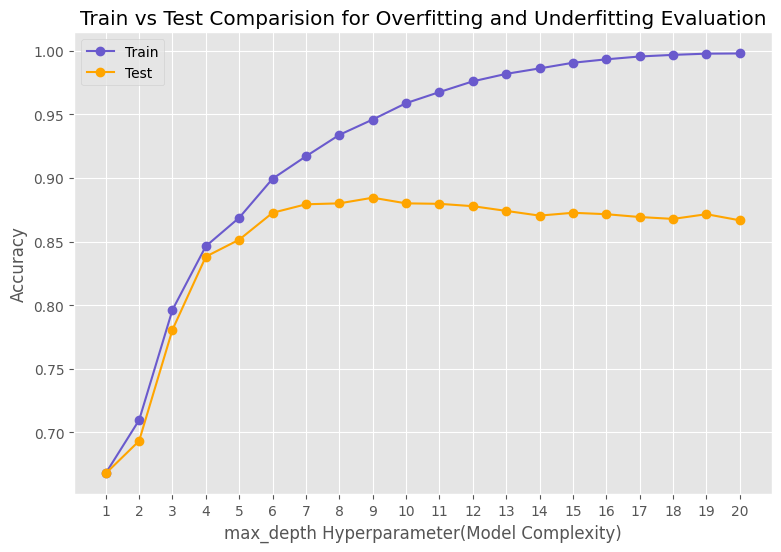

In [7]:
plt.figure(figsize=(9,6))


#for train:
plt.plot(values, train_scores, '-o', label='Train', color='slateblue')

#for test:
plt.plot(values, test_scores, '-o', label='Test', color='orange')


# '-o' gives Dotted Appearance 
plt.title('Train vs Test Comparision for Overfitting and Underfitting Evaluation')
plt.ylabel('Accuracy')
plt.xlabel('max_depth Hyperparameter(Model Complexity)')
plt.legend()
plt.xticks(values)

- As we increase **max_depth** the train accuracy goes up, the test accuarcy goes up halfway and starts plateauing and then decline 
- Underfitting: 1-2 (max_depth = 1 or 2 means Model is too simple to learn the data)
- Overfitting: 7 and above (Testing accuracy starts decreasing, 📌 Model is memorizing, not generalizing)
- Optimal range: 4-9 (In this depth range, **Test accuracy is highest** and **Gap between train & test accuracy is small**)



Suppose we picked max_depth of 5

In [8]:
dtc_model = DecisionTreeClassifier(max_depth = 5)

dtc_model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

**`dtc_model.feature_importances_`**
- It tells you how important each feature (column) is in making decisions in the Decision Tree model.

In [9]:
dtc_model.feature_importances_

array([0.0028858 , 0.        , 0.00033109, 0.04795045, 0.        ,
       0.00330353, 0.        , 0.06185532, 0.0952684 , 0.31770359,
       0.        , 0.        , 0.01070018, 0.        , 0.        ,
       0.24212804, 0.2178736 , 0.        ])

In [ ]:
feature_importance = pd.DataFrame({
                'Feature':range(18),                            #this is like column name - gives numbers from 0 to 17
                'Importance':dtc_model.feature_importances_})   #another column name - gives feature importance for each feature
feature_importance

,Feature,Importance
0,0,0.002886
1,1,0.000000
2,2,0.000331
3,3,0.047950
4,4,0.000000
5,5,0.003304
6,6,0.000000
7,7,0.061855
8,8,0.095268
9,9,0.317704


In [19]:
from sklearn.tree import export_text, plot_tree

#just pass our model to export_text() 
#similarly, just pass the model to plot_tree()

tree_view = export_text(dtc_model)      #Converting the tree to text
print(tree_view)

|--- feature_9 <= 0.67
|   |--- feature_16 <= -0.72
|   |   |--- feature_15 <= 0.67
|   |   |   |--- feature_9 <= -0.66
|   |   |   |   |--- feature_16 <= -1.73
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_16 >  -1.73
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_9 >  -0.66
|   |   |   |   |--- feature_16 <= -1.13
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_16 >  -1.13
|   |   |   |   |   |--- class: 1
|   |   |--- feature_15 >  0.67
|   |   |   |--- feature_8 <= 0.12
|   |   |   |   |--- feature_16 <= -2.07
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_16 >  -2.07
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_8 >  0.12
|   |   |   |   |--- feature_12 <= -0.83
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_12 >  -0.83
|   |   |   |   |   |--- class: 0
|   |--- feature_16 >  -0.72
|   |   |--- feature_7 <= 0.65
|   |   |   |--- feature_15 <= -1.16
|   |   |   |   |--- feature_16 <= 0.04
|   |

- **export_text** --> shows the tree as **text** rules
- **plot_tree**--> shows the tree as a **diagram**

[Text(0.5387931034482759, 0.9166666666666666, 'x[9] <= 0.671\ngini = 0.5\nsamples = 6300\nvalue = [3144, 3156]'),
 Text(0.27586206896551724, 0.75, 'x[16] <= -0.718\ngini = 0.477\nsamples = 4874\nvalue = [2963, 1911]'),
 Text(0.4073275862068966, 0.8333333333333333, 'True  '),
 Text(0.13793103448275862, 0.5833333333333334, 'x[15] <= 0.668\ngini = 0.494\nsamples = 2337\nvalue = [1037, 1300]'),
 Text(0.06896551724137931, 0.4166666666666667, 'x[9] <= -0.658\ngini = 0.314\nsamples = 1266\nvalue = [247, 1019]'),
 Text(0.034482758620689655, 0.25, 'x[16] <= -1.732\ngini = 0.428\nsamples = 145\nvalue = [100, 45]'),
 Text(0.017241379310344827, 0.08333333333333333, 'gini = 0.444\nsamples = 30\nvalue = [10, 20]'),
 Text(0.05172413793103448, 0.08333333333333333, 'gini = 0.34\nsamples = 115\nvalue = [90, 25]'),
 Text(0.10344827586206896, 0.25, 'x[16] <= -1.129\ngini = 0.228\nsamples = 1121\nvalue = [147, 974]'),
 Text(0.08620689655172414, 0.08333333333333333, 'gini = 0.14\nsamples = 820\nvalue = [62,

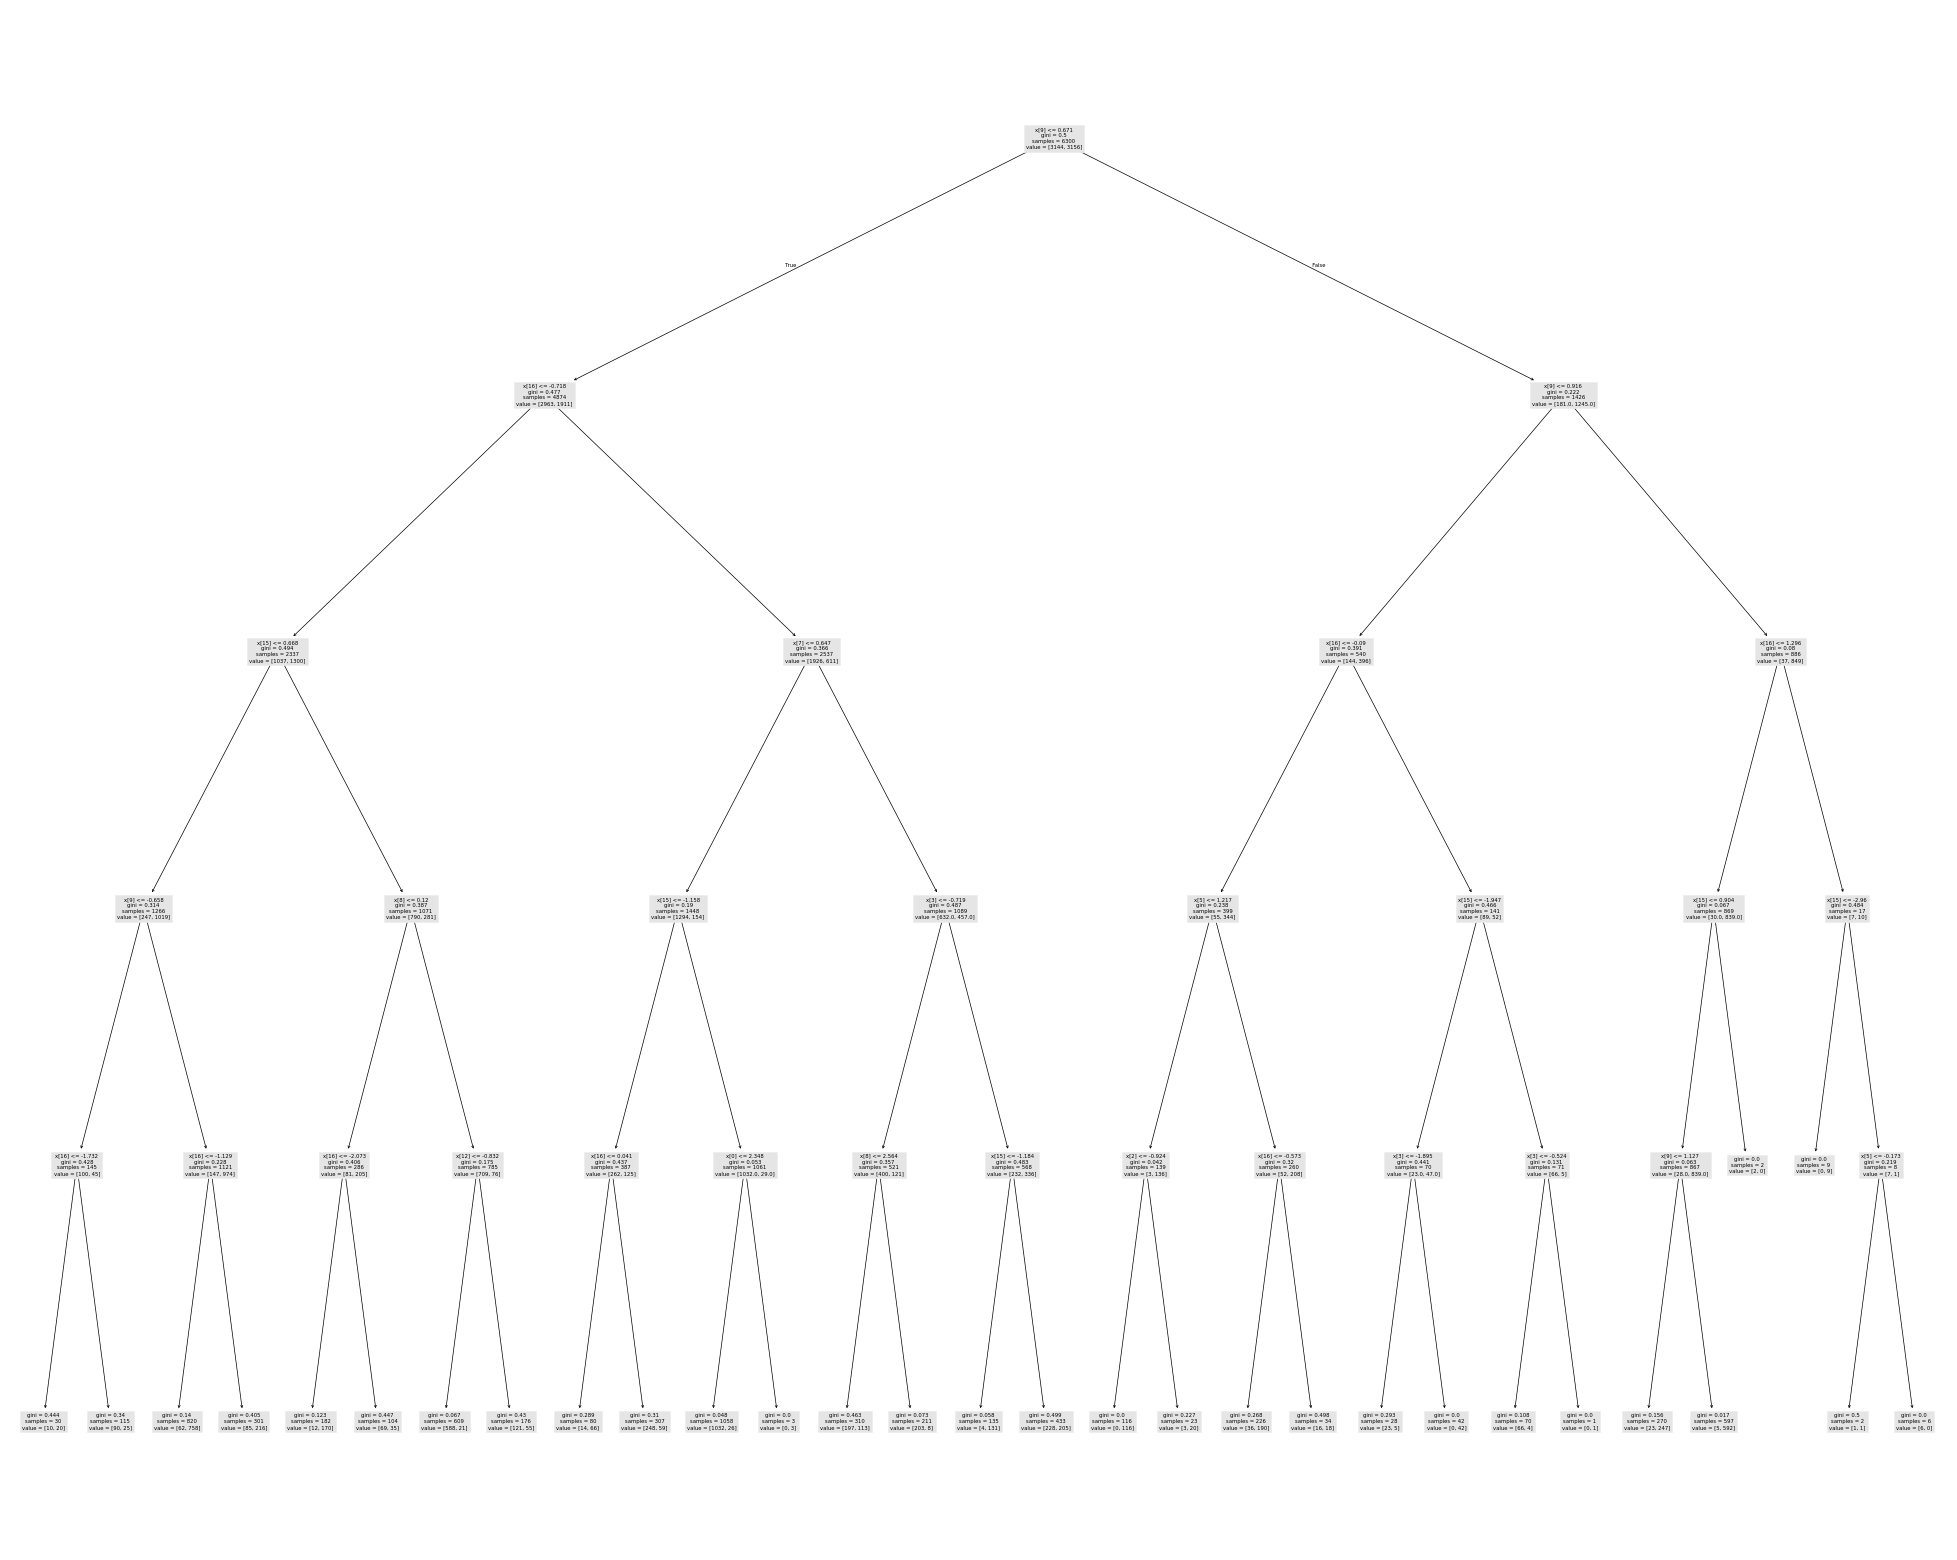

In [16]:
plt.figure(figsize=(25,20))

plot_tree(dtc_model)

[Text(0.5387931034482759, 0.9166666666666666, 'x[9] <= 0.671\ngini = 0.5\nsamples = 6300\nvalue = [3144, 3156]'),
 Text(0.27586206896551724, 0.75, 'x[16] <= -0.718\ngini = 0.477\nsamples = 4874\nvalue = [2963, 1911]'),
 Text(0.4073275862068966, 0.8333333333333333, 'True  '),
 Text(0.13793103448275862, 0.5833333333333334, 'x[15] <= 0.668\ngini = 0.494\nsamples = 2337\nvalue = [1037, 1300]'),
 Text(0.06896551724137931, 0.4166666666666667, 'x[9] <= -0.658\ngini = 0.314\nsamples = 1266\nvalue = [247, 1019]'),
 Text(0.034482758620689655, 0.25, 'x[16] <= -1.732\ngini = 0.428\nsamples = 145\nvalue = [100, 45]'),
 Text(0.017241379310344827, 0.08333333333333333, 'gini = 0.444\nsamples = 30\nvalue = [10, 20]'),
 Text(0.05172413793103448, 0.08333333333333333, 'gini = 0.34\nsamples = 115\nvalue = [90, 25]'),
 Text(0.10344827586206896, 0.25, 'x[16] <= -1.129\ngini = 0.228\nsamples = 1121\nvalue = [147, 974]'),
 Text(0.08620689655172414, 0.08333333333333333, 'gini = 0.14\nsamples = 820\nvalue = [62,

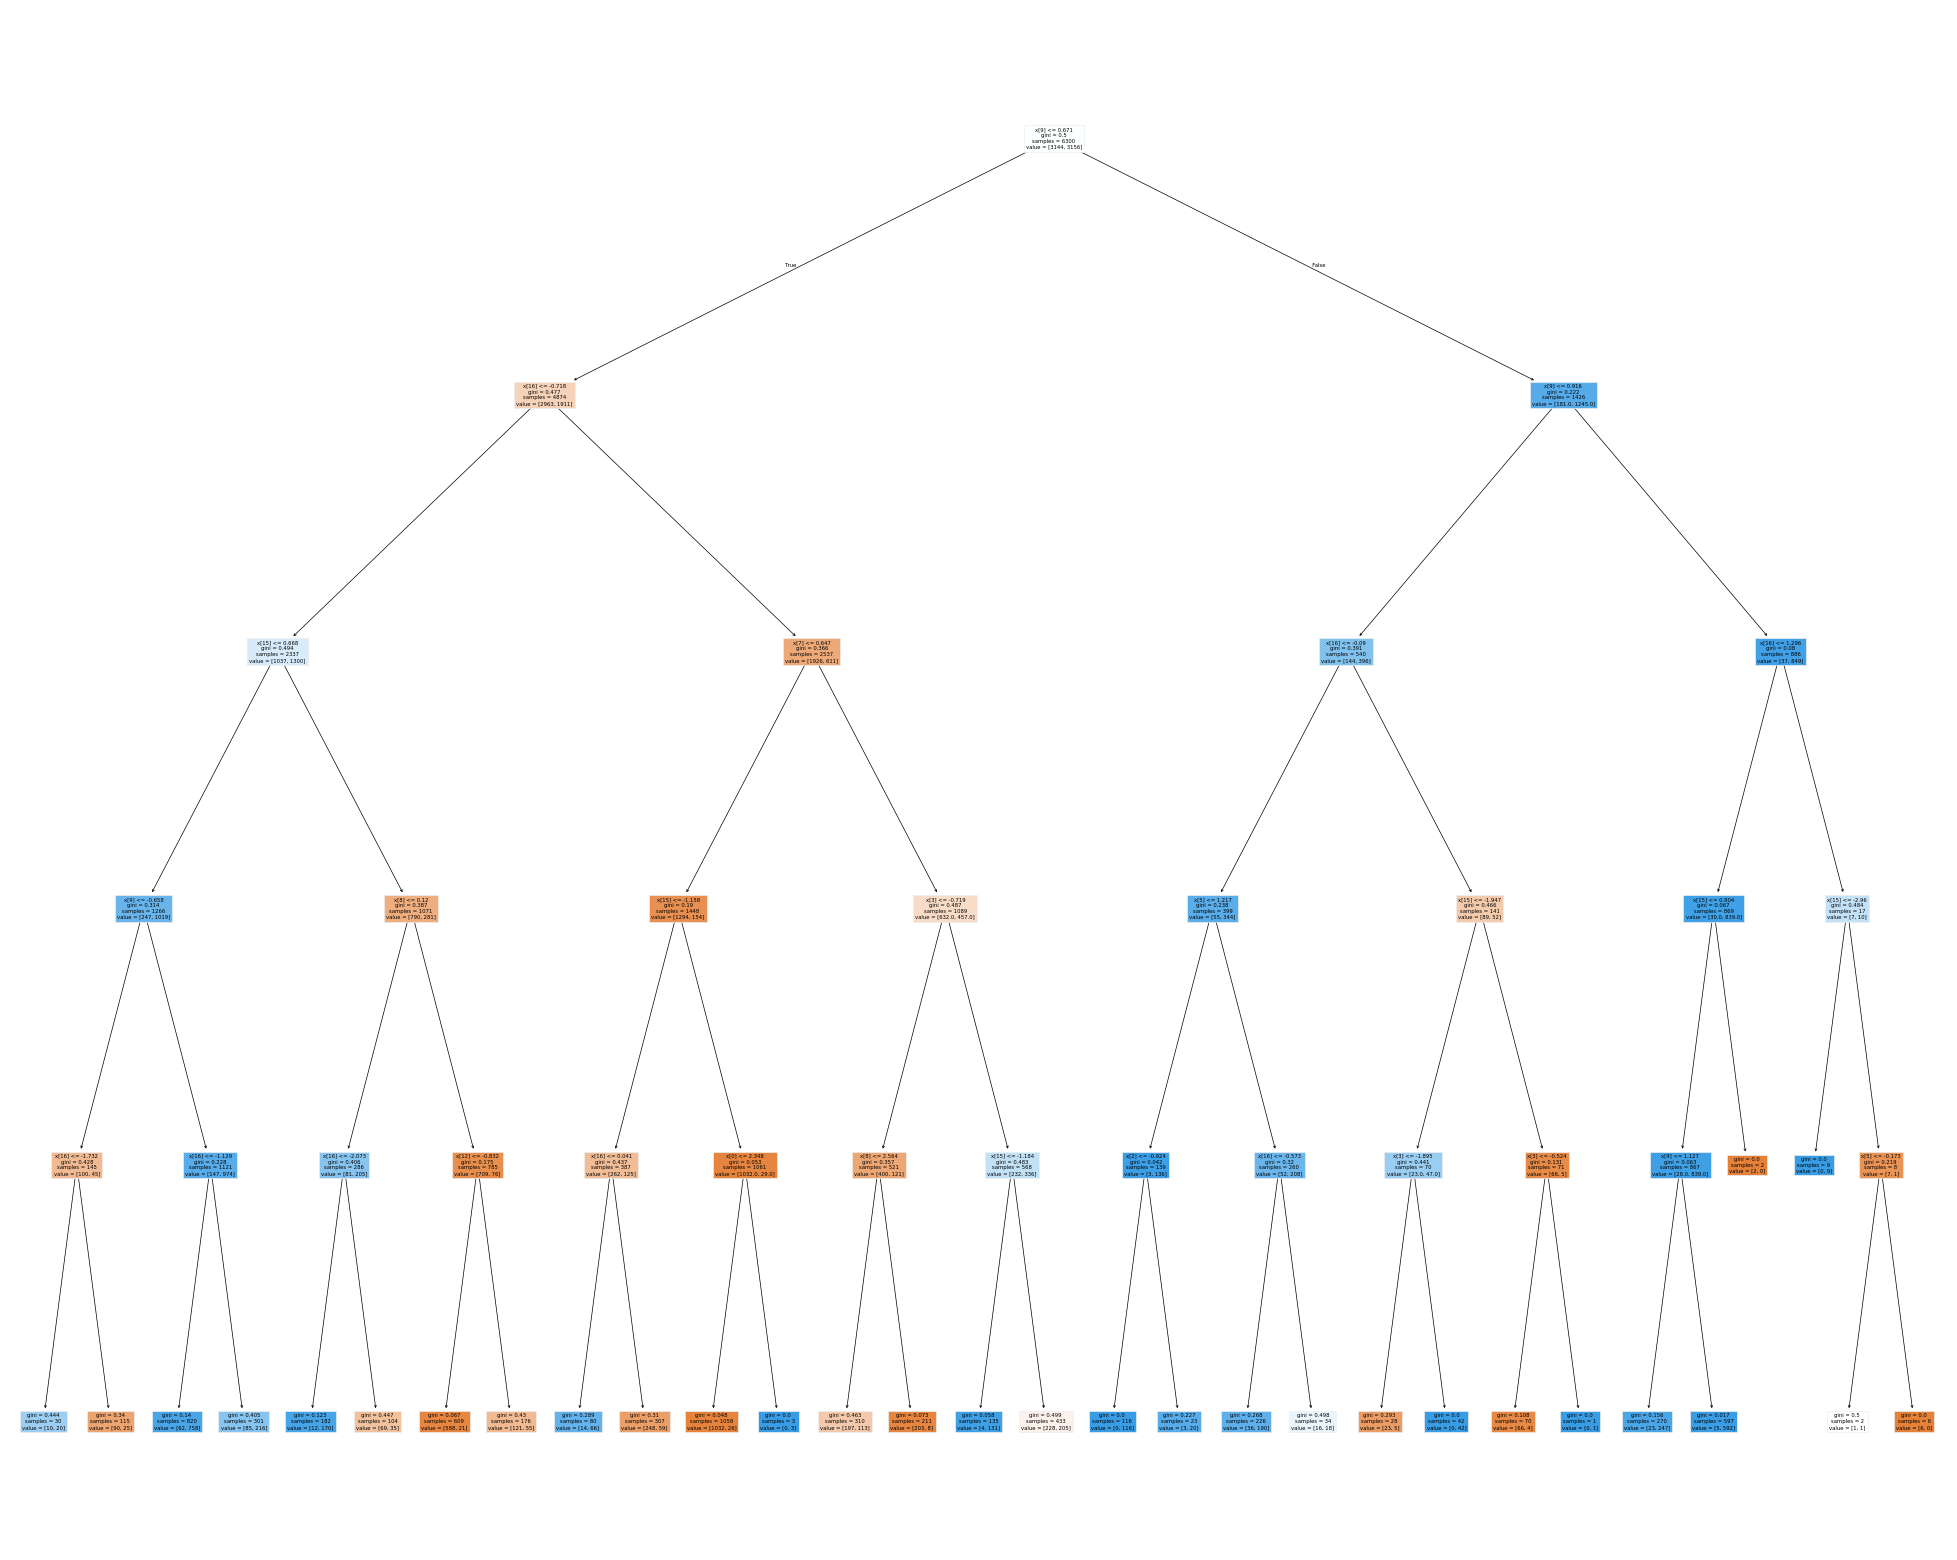

In [17]:
plt.figure(figsize=(25,20))

plot_tree(dtc_model, filled=True)

> Color Intensity shows Feature Importance  